![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_3_4_EXERCISES.ipynb)


# PANDAS

In [1]:
import pandas as pd
import numpy as np

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



*Importing dataset*

In [2]:
url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
user = pd.read_csv(url,sep='|')
user.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


*QUESTIONS ABOUT AGE*
* *Mean age per occupation*
* *For each occupation, calculate the minimum and maximum ages*
* *For each combination of occupation and gender, calculate the mean age*

In [3]:
# Mean age per occupation
round(user.groupby('occupation')['age'].mean(),1)

occupation
administrator    38.7
artist           31.4
doctor           43.6
educator         42.0
engineer         36.4
entertainment    29.2
executive        38.7
healthcare       41.6
homemaker        32.6
lawyer           36.8
librarian        40.0
marketing        37.6
none             26.6
other            34.5
programmer       33.1
retired          63.1
salesman         35.7
scientist        35.5
student          22.1
technician       33.1
writer           36.3
Name: age, dtype: float64

In [4]:
# Min and max age by occupation
user.pivot_table('age',index=['occupation'], aggfunc=[min, max])

,min,max
,age,age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62


In [5]:
# Mean age by occupation and gender
pd.set_option("display.precision",1)
user.pivot_table('age', index='occupation', columns='gender', aggfunc=np.mean)

gender,F,M
occupation,,
administrator,40.6,37.2
artist,30.3,32.3
doctor,NaN,43.6
educator,39.1,43.1
engineer,29.5,36.6
entertainment,31.0,29.0
executive,44.0,38.2
healthcare,39.8,45.4
homemaker,34.2,23.0


*QUESTIONS ABOUT MALE : FEMALE RATIO*
* *What is the male ratio per occupation? Sort from most to least*
* *What is the female ratio per occupation? Sort from most to least*
* *For each occupation present the percentage of women and men*

In [6]:
# New dataframe for male : female ratio
user_mf = user.pivot_table('user_id',index='occupation', columns='gender', aggfunc=len, fill_value=0)
user_mf

gender,F,M
occupation,,
administrator,36,43
artist,13,15
doctor,0,7
educator,26,69
engineer,2,65
entertainment,2,16
executive,3,29
healthcare,11,5
homemaker,6,1


In [7]:
# Add new columns and calculate ratio : percentage of women and men by occupation
pd.set_option("display.precision",1)
user_mf['Total'] = user_mf['F'] + user_mf['M']
user_mf['% F'] = round(100*(user_mf['F'] / user_mf['Total']),1)
user_mf['% M'] = round(100*(user_mf['M'] / user_mf['Total']),1)
user_mf

gender,F,M,Total,% F,% M
occupation,,,,,
administrator,36,43,79,45.6,54.4
artist,13,15,28,46.4,53.6
doctor,0,7,7,0.0,100.0
educator,26,69,95,27.4,72.6
engineer,2,65,67,3.0,97.0
entertainment,2,16,18,11.1,88.9
executive,3,29,32,9.4,90.6
healthcare,11,5,16,68.8,31.2
homemaker,6,1,7,85.7,14.3


In [8]:
# Male ratio by occupation, sorted
print('% Male by Occupation')
user_mf['% M'].sort_values(ascending = False)

% Male by Occupation


occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: % M, dtype: float64

In [9]:
# Female ratio by occupation, sorted
print('% Female by Occupation')
user_mf['% F'].sort_values(ascending = False)

% Female by Occupation


occupation
homemaker        85.7
healthcare       68.8
librarian        56.9
artist           46.4
administrator    45.6
none             44.4
writer           42.2
marketing        38.5
other            34.3
student          30.6
educator         27.4
salesman         25.0
lawyer           16.7
entertainment    11.1
scientist         9.7
executive         9.4
programmer        9.1
retired           7.1
technician        3.7
engineer          3.0
doctor            0.0
Name: % F, dtype: float64

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


*PREPARE DATASET*
* *What is the type of the columns?*
* *Convert the type of the column Year to datetime64*
* *Set the Year column as the index of the dataframe*
* *Delete the Total column*



In [10]:
# Import, set year as index and parse dates
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(url, index_col='Year', parse_dates=True)
crime.info(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [11]:
# Year (as index) is a datetime64
crime.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype

In [12]:
# Data types of other columns
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


In [13]:
# delete Total column (not in place; just to demonstrate)
crime.drop(axis=1, columns=['Total'])

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [14]:
# Quick check
crime.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,55.0,2.5e+08,4.2e+07,1.8e+08,2.1e+08,2.4e+08,2.8e+08,3.2e+08
Total,55.0,1.1e+07,3.2e+06,3.4e+06,9.1e+06,1.1e+07,1.3e+07,1.5e+07
Violent,55.0,1.2e+06,4.6e+05,2.9e+05,9.3e+05,1.3e+06,1.4e+06,1.9e+06
Property,55.0,9.4e+06,2.7e+06,3.1e+06,8.1e+06,1.0e+07,1.2e+07,1.3e+07
Murder,55.0,1.7e+04,4.3e+03,8.5e+03,1.5e+04,1.7e+04,2.1e+04,2.5e+04
Forcible_Rape,55.0,7.3e+04,2.8e+04,1.7e+04,5.3e+04,8.4e+04,9.3e+04,1.1e+05
Robbery,55.0,4.2e+05,1.5e+05,1.1e+05,3.5e+05,4.2e+05,5.1e+05,6.9e+05
Aggravated_assault,55.0,6.8e+05,3.0e+05,1.5e+05,4.4e+05,7.4e+05,9.0e+05,1.1e+06
Burglary,55.0,2.4e+06,7.3e+05,9.1e+05,2.1e+06,2.3e+06,3.1e+06,3.8e+06
Larceny_Theft,55.0,6.0e+06,1.8e+06,1.9e+06,4.8e+06,6.6e+06,7.2e+06,8.1e+06


*ANALYSE DATA*
* *Group the year by decades and sum the values (take care with population values)*
* *What is the most dangerous decade to live in the US?*

In [15]:
# Group year by decades, calculate sum values
crime_dec = crime.groupby((crime.index.year//10)*10).sum()
crime_dec

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [16]:
# Population : take max values by decade and replace the sum values of Population
pop_dec = crime['Population'].groupby((crime.index.year//10)*10).max()
crime_dec['Population'] = pop_dec
crime_dec

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,201385000,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

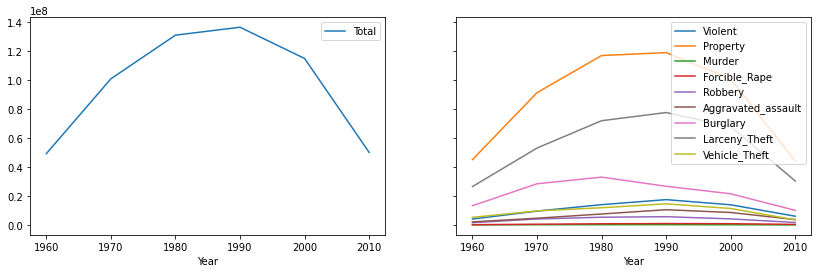

In [18]:
# Most dangerous decade to live in the US: 1990s
# Primarily driven by property and larceny crimes
fig, ax = plt.subplots(1,2, figsize=(14,4), sharey=True)
crime_dec['Total'].plot(ax=ax[0], legend='Total')
crime_dec.loc[:,'Violent':].plot(ax=ax[1])

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

*PREPARE DATA & UTILITIES*
* *Load in Pandas*
* *Save as SQLite*
* *Prepare utility functions*

In [66]:
# Load in Pandas
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4


In [67]:
# Save dataframe as SQLite
import sqlite3
connect = sqlite3.connect('tips.db')
tips.to_sql('tips', con= connect)
connect.close()

In [68]:
# Function to open / create connection
def connect(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    return connection, cursor

In [69]:
# Function to commit and close connection
def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

*ANSWER QUESTIONS*
* *Who is most likely to receive a tip during weekday? (M or F)*
* *Who is most likely to receive a tip during weekend? (M or F)*
* *What is the table size that is most likely to bring a better tip?*
* *Who are giving more tips, smokers or non smokers?* 

**Who (male or female) is most likely to receive a tip during weekday? Weekend?**

In [70]:
# Get data
connection, cursor = connect('tips.db')
query = 'SELECT day, sex, COUNT(*) FROM tips GROUP BY day, sex'
tips1 = pd.read_sql_query(query, connection)
tips1

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [71]:
# Manual recode
tips1['Weeksplit'] = np.where(tips1['day'] == 'Thur', 'Weekday', np.NaN)
tips1['Weeksplit'] = np.where(tips1['day'] == 'Fri', 'Weekday', tips1['Weeksplit'])
tips1['Weeksplit'] = np.where(tips1['day'] == 'Sat', 'Weekend', tips1['Weeksplit'])
tips1['Weeksplit'] = np.where(tips1['day'] == 'Sun', 'Weekend', tips1['Weeksplit'])
tips1

,day,sex,COUNT(*),Weeksplit
0,Fri,Female,9,Weekday
1,Fri,Male,10,Weekday
2,Sat,Female,28,Weekend
3,Sat,Male,59,Weekend
4,Sun,Female,18,Weekend
5,Sun,Male,58,Weekend
6,Thur,Female,32,Weekday
7,Thur,Male,30,Weekday


In [72]:
# Answer : during the week, both males & females are equally likely to receive tips
# However, more males received tips during the weekend
# Note : this may simply be due to more males work during the weekend
tips1.groupby(['Weeksplit','sex']).sum()

COUNT(*)
Weeksplit sex             
Weekday   Female        41
          Male          40
Weekend   Female        46
          Male         117

**What is the table size that is most likely to bring a better tip?**

In [73]:
# Get data
connection, cursor = connect('tips.db')
query = 'SELECT size, COUNT(size) as count, \
        SUM(total_bill) as total_bill, SUM(tip) as total_tip \
        FROM tips GROUP BY size'
tips2 = pd.read_sql_query(query, connection)
tips2

,size,count,total_bill,total_tip
0,1,4,29.0,5.8
1,2,156,2565.9,402.8
2,3,38,884.6,128.9
3,4,37,1058.7,153.0
4,5,5,150.3,20.1
5,6,4,139.3,20.9


In [74]:
# Add more columns 
tips2['avg_tip'] = tips2['total_tip']/tips2['count']
tips2['perc_tip'] = 100*tips2['total_tip']/tips2['total_bill']
tips2

,size,count,total_bill,total_tip,avg_tip,perc_tip
0,1,4,29.0,5.8,1.4,19.8
1,2,156,2565.9,402.8,2.6,15.7
2,3,38,884.6,128.9,3.4,14.6
3,4,37,1058.7,153.0,4.1,14.5
4,5,5,150.3,20.1,4.0,13.4
5,6,4,139.3,20.9,5.2,15.0


In [75]:
# Based on the average tip per table, the table size with the largest tip = 6 
tips2[tips2['avg_tip'] == tips2['avg_tip'].max()]

,size,count,total_bill,total_tip,avg_tip,perc_tip
5,6,4,139.3,20.9,5.2,15.0


In [76]:
# But the most generous, based on % of total bill, is table size 1 
tips2[tips2['perc_tip'] == tips2['perc_tip'].max()]

,size,count,total_bill,total_tip,avg_tip,perc_tip
0,1,4,29.0,5.8,1.4,19.8


**Who are giving more tips, smokers or non smokers?**

In [77]:
# Get data
connection, cursor = connect('tips.db')
query = 'SELECT smoker, COUNT(smoker) as count, \
        SUM(total_bill) as total_bill, SUM(tip) as total_tip \
        FROM tips GROUP BY smoker'
tips3 = pd.read_sql_query(query, connection)
tips3

,smoker,count,total_bill,total_tip
0,No,151,2897.4,451.8
1,Yes,93,1930.3,279.8


In [78]:
# Add more columns 
# No difference in the average tip given by smoker / non smoker ($3)
# But non smokers are a bit more generous, giving 15.6% of total bill
tips3['avg_tip'] = tips3['total_tip']/tips3['count']
tips3['perc_tip'] = 100*tips3['total_tip']/tips3['total_bill']
tips3

,smoker,count,total_bill,total_tip,avg_tip,perc_tip
0,No,151,2897.4,451.8,3.0,15.6
1,Yes,93,1930.3,279.8,3.0,14.5


In [79]:
commit_close(connection, cursor)

## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



*PREPARE DATA & UTILITIES*
* *Download database*
* *Prepare utility functions*

In [80]:
# Download database
!wget "https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db"

--2020-11-03 13:35:11--  https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db [following]
--2020-11-03 13:35:11--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db’

flights.db          100%[===================>]   5.17M  13.9MB/s    in 0.4s    

2020-11-03 13:35

In [81]:
import sqlite3

In [82]:
# Function to open / create connection
def connect(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    return connection, cursor

In [93]:
# Function to commit and close connection
def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

*ANSWER QUESTIONS:*
* *Which is the country that has the least amount of active airlines?*
* *And which is the country that has the most amount of active airlines?*
* *Which is the country that has more airports?*
* *And the country with the least airports?*
* *Which country has the most outgoing destinations? And the least?*
* *And which country has the most incoming destinations? And the least?*

**Which country has the most / least number of active airlines?**

In [83]:
# Get data
connection, cursor = connect('flights.db')
query = 'SELECT country, active, COUNT(*) as nb_active FROM airlines WHERE active = "Y" GROUP BY country'
active = pd.read_sql_query(query, connection)
active

,country,active,nb_active
0,None,Y,2
1,S.A.,Y,1
2,ALASKA,Y,1
3,AVIANCA,Y,1
4,Afghanistan,Y,4
...,...,...,...
190,Vietnam,Y,7
191,Yemen,Y,2
192,Zambia,Y,3
193,Zimbabwe,Y,3


In [84]:
# Country with the highest number of active airlines : USA

active[active['nb_active'] == active['nb_active'].max()]

,country,active,nb_active
185,United States,Y,141


In [85]:
# Country with the lowest number of active airlies : tied between 60 countries (only 1 active arline each)
# However, based on close inspection, there seems to be 4 records that are not real countries
# Namely : S.A., ALASKA (it's a state or airline), AVIANCA and DRAGON (both seem to be airlines)
# So, I think it's a tie between 56 countries 

print("Number of countries with least amount of active airlines: ",
      len(active[active['nb_active'] == active['nb_active'].min()]))
active.loc[(active['nb_active'] == active['nb_active'].min()),['country','nb_active']]

Number of countries with least amount of active airlines:  60


,country,nb_active
1,S.A.,1
2,ALASKA,1
3,AVIANCA,1
7,American Samoa,1
9,Antigua and Barbuda,1
12,Aruba,1
17,Bahrain,1
23,Benin,1
24,Bhutan,1
27,Botswana,1


**Which country has the highest / lowest number of airports?**

In [86]:
# Get data
connection, cursor = connect('flights.db')
query = 'SELECT country, COUNT(code) as nb_airport_codes, COUNT(name) as nb_airport_names \
        FROM airports GROUP BY country'
airports = pd.read_sql_query(query, connection)
airports

,country,nb_airport_codes,nb_airport_names
0,Afghanistan,16,21
1,Albania,1,1
2,Algeria,35,44
3,American Samoa,3,3
4,Angola,22,26
...,...,...,...
235,West Bank,0,1
236,Western Sahara,3,3
237,Yemen,10,11
238,Zambia,8,13


In [87]:
# Country with the highest number of airports : USA

print(airports[airports['nb_airport_codes'] == airports['nb_airport_codes'].max()])

           country  nb_airport_codes  nb_airport_names
226  United States              1459              1697


In [88]:
# Country / territories with the lowest number of airports : 
# Based on airport codes, there are 3 countries (British Indian Ocean Territory, St Helena, West Bank)
# But there are countries / territories that have airports without the 3-letter codes e.g. Antarctica has 19

airports[airports['nb_airport_codes'] == airports['nb_airport_codes'].min()]

,country,nb_airport_codes,nb_airport_names
6,Antarctica,0,19
28,British Indian Ocean Territory,0,1
180,Saint Helena,0,1
198,South Georgia and the Islands,0,2
205,Svalbard,0,4
235,West Bank,0,1


In [89]:
# Counting the airport names, there are 30 countries with only 1 airport

print("Number of countries with fewest airports: ",
      len(airports[airports['nb_airport_names'] == airports['nb_airport_names'].min()]))
airports[airports['nb_airport_names'] == airports['nb_airport_names'].min()]

Number of countries with fewest airports:  30


,country,nb_airport_codes,nb_airport_names
1,Albania,1,1
5,Anguilla,1,1
10,Aruba,1,1
17,Barbados,1,1
21,Benin,1,1
23,Bhutan,1,1
28,British Indian Ocean Territory,0,1
34,Burundi,1,1
44,Christmas Island,1,1
45,Cocos (Keeling) Islands,1,1


**Which country has the most / least number of outgoing / incoming destinations?**

In [90]:
# Get data
connection, cursor = connect('flights.db')
query = 'SELECT \
CAST(source.country AS TEXT) AS source_country, \
CAST(source.city AS TEXT) AS source_city, \
CAST(destin.country AS TEXT) AS destin_country, \
CAST(destin.city AS TEXT) AS destin_city \
FROM routes \
INNER JOIN airports source ON source.id = routes.source_id \
INNER JOIN airports destin ON destin.id = routes.dest_id'

sou_des = pd.read_sql_query(query, connection)
sou_des

,source_country,source_city,destin_country,destin_city
0,Russia,Sochi,Russia,Kazan
1,Russia,Astrakhan,Russia,Kazan
2,Russia,Astrakhan,Russia,Mineralnye Vody
3,Russia,Chelyabinsk,Russia,Kazan
4,Russia,Chelyabinsk,Russia,Novosibirsk
...,...,...,...,...
67197,Australia,Whyalla,Australia,Adelaide
67198,Russia,Moscow,Kyrgyzstan,Bishkek
67199,Kyrgyzstan,Bishkek,Russia,Moscow
67200,Kyrgyzstan,Bishkek,Kyrgyzstan,Osh


In [91]:
# Country with the most and least number of outgoing destinations (outgoing flights)
print("Country with the most number of outgoing flights")
print(sou_des['source_country'].value_counts().head(1))
print("\n")
print("Countries with the lowest number of outgoing flights")
print(sou_des['source_country'].value_counts(ascending=False).tail(10))

Country with the most number of outgoing flights
United States    13178
Name: source_country, dtype: int64


Countries with the lowest number of outgoing flights
Norfolk Island             3
Christmas Island           2
Tuvalu                     1
American Samoa             1
Monaco                     1
Swaziland                  1
Lesotho                    1
Niue                       1
Falkland Islands           1
Cocos (Keeling) Islands    1
Name: source_country, dtype: int64


In [92]:
# Country with the most and least number of incoming destinations (incoming flights)
print("Country with the most number of incoming  flights")
print(sou_des['destin_country'].value_counts().head(1))
print("\n")
print("Countries with the lowest number of incoming flights")
print(sou_des['destin_country'].value_counts(ascending=False).tail(10))

Country with the most number of incoming  flights
United States    13173
Name: destin_country, dtype: int64


Countries with the lowest number of incoming flights
Nauru                      3
Christmas Island           2
Norfolk Island             2
Cocos (Keeling) Islands    1
Falkland Islands           1
Swaziland                  1
Lesotho                    1
American Samoa             1
Monaco                     1
Tuvalu                     1
Name: destin_country, dtype: int64


*Post-exercise comment : I think I should have counted how many **unique** cities per country there are in the source_city and destin_city columns; but not sure how to do that.*

In [94]:
commit_close(connection,cursor)

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



**Load and check data**

In [95]:
url = 'https://raw.githubusercontent.com/antiantono/bts-dsf-anti/main/data/train.csv'
titanic = pd.read_csv(url,sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S


In [96]:
# Check numerics

In [97]:
# Check categoricals
titanic.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Urho Abraham",male,1601,G6,S
freq,1,577,7,4,644


In [98]:
# Check number of valid values 
print("Nb of valid values in Age:",len(titanic['Age'].dropna()))
print("Nb of valid values in Embarked:",len(titanic['Embarked'].dropna()))
print("Nb of valid values in Pclass:",len(titanic['Pclass'].dropna()))

Nb of valid values in Age: 714
Nb of valid values in Embarked: 889
Nb of valid values in Pclass: 891


**1. How many men and women survived?**

In [99]:
# Total 342 survived, 233 women and 109 men
titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

**2. What's the age group that had higher survival chance?**

In [100]:
# Create pivot table : died (0) / survived (1) by age
by_age = titanic.pivot_table(values='PassengerId', index = 'Age', columns='Survived', aggfunc=len, fill_value= 0)
by_age.head()

Survived,0,1
Age,,
0.4,0,1
0.7,0,1
0.8,0,2
0.8,0,2
0.9,0,1


In [101]:
# Tidy up pivot table : rename columns; add total count and age groups by decade
by_age.columns = ['Died', 'Survived']
by_age['Total'] = by_age['Died'] + by_age['Survived']
by_age['Age_Group'] = 10 * (by_age.index // 10)
by_age

,Died,Survived,Total,Age_Group
Age,,,,
0.4,0,1,1,0.0
0.7,0,1,1,0.0
0.8,0,2,2,0.0
0.8,0,2,2,0.0
0.9,0,1,1,0.0
...,...,...,...,...
70.0,2,0,2,70.0
70.5,1,0,1,70.0
71.0,2,0,2,70.0


In [102]:
# Check total records : 714 (consistent with NaN check)
by_age['Total'].sum()

714

In [103]:
# Calculate survival rate (Survived / Total)
# Highest survival rate (100%) is in the 80s group 
surv_rate = by_age.groupby('Age_Group')['Survived'].sum() / by_age.groupby('Age_Group')['Total'].sum()
surv_rate.sort_values(ascending=False)

Age_Group
80.0    1.0
0.0     0.6
30.0    0.4
50.0    0.4
10.0    0.4
40.0    0.4
20.0    0.3
60.0    0.3
70.0    0.0
dtype: float64

In [104]:
# However, when checking the group size there is only one passenger in the 80s group
# For groups consisting of at least 10 passengers, the highest survival rate (61%) belongs to age 0 (babies) 
surv_size = by_age.groupby('Age_Group').size()
surv_size

Age_Group
0.0     14
10.0    11
20.0    14
30.0    14
40.0    12
50.0    11
60.0     7
70.0     4
80.0     1
dtype: int64

**3. Which port of embarkation had most of the survivors? And which less?**

In [105]:
# Create pivot table : died (0) / survived (1) by port of embarkation
by_port = titanic.pivot_table(values='PassengerId', index = 'Embarked', columns='Survived', aggfunc=len, fill_value= 0)
by_port.head()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [106]:
# Tidy up : rename columns and index (based on data dictionary on Kaggle)
by_port.columns = ['Died', 'Survived']
by_port.index = ['Cherbourg', 'Queenstown', 'Southampton']
by_port

,Died,Survived
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


In [107]:
# Add total count and % survived
# As the main embarkation point, Southampton had the most surviving passengers (644) but lowest survival rate
# Those embarking from Cherbourg were the luckiest with 55% survived 
by_port['Total'] = by_port['Died'] + by_port['Survived']
by_port['Perc_Survived'] = 100 * round((by_port['Survived'] / by_port['Total']),3)
by_port

,Died,Survived,Total,Perc_Survived
Cherbourg,75,93,168,55.4
Queenstown,47,30,77,39.0
Southampton,427,217,644,33.7


**4. Which ticket class had most of the survivors? And which less?**

In [108]:
# Create pivot table : died (0) / survived (1) by passenger class
by_class = titanic.pivot_table(values='PassengerId', index = 'Pclass', columns='Survived', aggfunc=len, fill_value= 0)
by_class.head()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [109]:
# Tidy up : rename columns and index (based on data dictionary on Kaggle)
by_class.columns = ['Died', 'Survived']
by_class.index = ['1st Class', '2nd Class', '3rd Class']
by_class

,Died,Survived
1st Class,80,136
2nd Class,97,87
3rd Class,372,119


In [110]:
# Add total count and % survived
# The number of passengers who survived, as well as the survival rate, is highest in 1st class
# While 3rd class has the second highest number of surviving passengers, the survival rate is lowest :( 
by_class['Total'] = by_class['Died'] + by_class['Survived']
by_class['Perc_Survived'] = 100 * round((by_class['Survived'] / by_class['Total']),3)
by_class

,Died,Survived,Total,Perc_Survived
1st Class,80,136,216,63.0
2nd Class,97,87,184,47.3
3rd Class,372,119,491,24.2


**5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?**

In [111]:
# First check : compare mean fares in the survival groups
# Those who survived paid a higher ticket fare on average
# This seems consistent with the previous finding; we know that survival rate was highest among 1st class passengers
titanic.groupby('Survived')['Fare'].mean()

Survived
0    22.1
1    48.4
Name: Fare, dtype: float64

In [112]:
# But is there more than meets the eye? Let's visualize the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

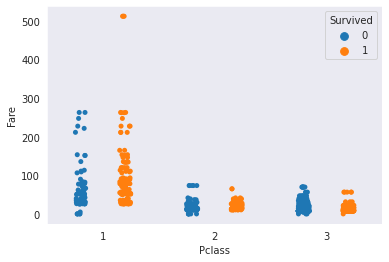

In [113]:
# Data to plot
fare = titanic['Fare']
survived = titanic['Survived']
pclass = titanic['Pclass']

# Plot
sns.stripplot(x=pclass, y=fare, hue=survived, dodge=True)

# Apparently there were passengers who paid for an extremely higher fare, and they survived
# However, they were outliers that made it seems like higher fares are associated with higher survival

# When we look at the rest of the data, and especially within the first class that has a wider range of fares,
# it doesn't seem like there is a strong relationship between fares paid and survival
# (otherwise all the orange dots will sit higher than the blue dots) 